In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
rows = []
with open('data.txt','r') as file:
    for line in file:
        line = np.array(line.split(' '))
        line = line.astype(np.float)
        rows.append(line)
rows = np.array(rows)

In [3]:
data = StandardScaler().fit_transform(rows)

# print(len(S))
S = np.cov(data.T)
print(S)
print(len(data))

[[ 1.001001   -0.52321505  0.94317205 ...  0.94265375  0.94237121
   0.94288611]
 [-0.52321505  1.001001   -0.20759705 ... -0.20788077 -0.20558825
  -0.20688258]
 [ 0.94317205 -0.20759705  1.001001   ...  1.00010242  1.00067435
   1.00074872]
 ...
 [ 0.94265375 -0.20788077  1.00010242 ...  1.001001    0.9999984
   1.00001326]
 [ 0.94237121 -0.20558825  1.00067435 ...  0.9999984   1.001001
   1.00064307]
 [ 0.94288611 -0.20688258  1.00074872 ...  1.00001326  1.00064307
   1.001001  ]]
1000


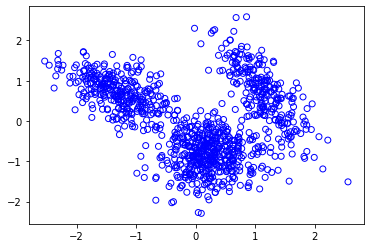

In [7]:
def get_CoVariance(rows):    
    N = len(rows)
    D = len(rows[0])
    mean = np.mean(rows, axis=0)
    rows_ = rows-mean
    S = np.dot(rows_.T, rows_.conj()) / (N-1)
#     print(S)
    
    eig_vals, eig_vecs = np.linalg.eig(S)
#     print("Eigen Values \n\n",eig_vals)
#     print("Eigen Vectors \n\n",eig_vecs)
    
    # Make a list of (eigenvalue, eigenvector) tuples
    eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

    # Sort the (eigenvalue, eigenvector) tuples from high to low
    eig_pairs.sort(key=lambda x: x[0], reverse=True)
    
    
    eigen_vectors = np.zeros((100,100))   
    i=0
    for a, b in eig_pairs:
        eigen_vectors[i]=b
        i+=1
        
#     print(eigen_vectors)

    max_eigen_vector = np.array([eigen_vectors[:, 0], eigen_vectors[:, 1]])
    processed_data = np.dot(rows, max_eigen_vector.T)
    plt.scatter(processed_data[:,0], processed_data[:,1], facecolors='none', edgecolors = 'blue')
    return processed_data
         
processed_data = get_CoVariance(data)     

In [ ]:
def EM(processed_data):
    mean, co_variances, co_effs = init(processed_data)
    
EM(processed_data)

In [79]:
print(len(processed_data))

1000
